In [58]:
import pandas as pd
import matplotlib.pyplot as plt

### Process Files into Dataframes

In [59]:
'''
For Graphs, what we need to do is graph the following things:
- Number of privately owned vs state-owned electronics companies
- Debt vs Equity Financing for Electronics companies
- Number of privately owned vs state-owned real estate companies
- Real Estate financing over time
- Comparing number of firms in real estate vs electronics
'''

df_e = pd.read_excel("excel_data/china_electronics_financial_data.xlsx")

df_re = pd.read_excel("excel_data/china_real_estate_financial_data.xlsx")

#### Number of privately owned vs state-owned electronics companies

In [60]:
df_e['year'] = df_e['year'].astype(str)
df_e_yr = df_e[df_e['year'].str.contains(r'-12-', na=False)].copy()
df_e_yr['year'] = df_e_yr['year'].str.slice(start=0, stop=4)

df_e_num = df_e_yr[["year", "CN: Electronic Industry: No of Enterprise"]].copy()
df_e_num.dropna(inplace=True)

df_re['year'] = df_re['year'].astype(str)
df_re_yr = df_re[df_re['year'].str.contains(r'-12-', na=False)].copy()
df_re_yr['year'] = df_re_yr['year'].str.slice(start=0, stop=4)

df_re_num = df_re_yr[["year", "CN: Real Estate: No of Enterprise"]].copy()
df_re_num.dropna(inplace=True)

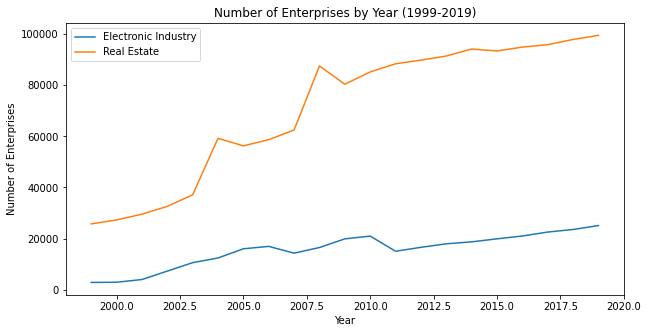

In [61]:
df_e_num['year'] = pd.to_numeric(df_e_num['year'])
df_re_num['year'] = pd.to_numeric(df_re_num['year'])
# Filter the DataFrames to include only the years from 1999 to 2019
df_e_num_filtered = df_e_num[(df_e_num['year'] >= 1999) & (df_e_num['year'] <= 2019)]
df_re_num_filtered = df_re_num[(df_re_num['year'] >= 1999) & (df_re_num['year'] <= 2019)]

# Plotting the line graph
plt.figure(figsize=(10, 5))

# Plotting Electronic Industry data
plt.plot(df_e_num_filtered['year'], df_e_num_filtered['CN: Electronic Industry: No of Enterprise'], label='Electronic Industry')

# Plotting Real Estate data
plt.plot(df_re_num_filtered['year'], df_re_num_filtered['CN: Real Estate: No of Enterprise'], label='Real Estate')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Enterprises')
plt.title('Number of Enterprises by Year (1999-2019)')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

#### Shareholders Equity in Each Industry

#### Number of privately owned vs state-owned real estate companies

#### Comparing number of companies in electronics vs real estate